# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

Answer:
1. The Smartcab does not move at all in the simulation of the environment
2. There are two kinds of rewards that the driving agent receives. One is when the driving agent is idle on a red light. This shows that the agent will not collide with the oncomming traffic. Second kind of reward is reward associated with moving the cab when the traffic light turns green.
3. Right now, our cab is not moving. So, on a red light, it receives positive reward for not colliding with oncomming traffic and staying put on a red light.This reward changes when the the traffic light changes to green.Since, our cab is not moving right now, it receives a negative reward for not moving closer to the destination.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

Answer:
1. Of the many flags that can change the simulation, three flags of my choice are learning, epsilon and aplha. by turing learning to TRUE, the driving agent will be force to use Q-learning to learn and reach its destination. Epsilon is like a hyperparameter for Q-learning. It shows the exploration factor of the driving agent. Changing this value will cause the driving agent to be less exploring when it has to travel from its start point to end point. Alpha is the learning rate of the smartcab. It shows the extend of how much the newly acquired information will override the old information.

2. In the class definition of Environment, there is a function "act" which is called when an agent performs an action. Based on the action and its legality, it is rewarded.

3. There are two ways to render the trial results, one in the pygame gui and he other one in terminal itself. function "render" gui based render display of the simulation. Whereas, "render_text"  is non-gui render display for the simulation.

4. First it will check for East-West direction and then for North-South Direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


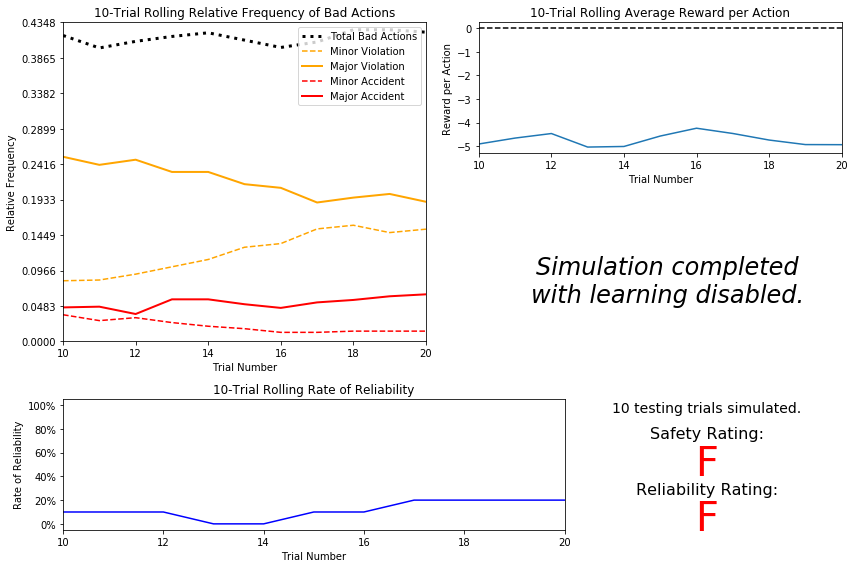

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

Answer:
1. From the first plot, it is evident, that our driving agent makes lots of bad decision with the relative frequency of the bad decision on a 10 trials falling between the rage of .360 - 0.405. Also, this plot shows the mean number of wrong decision that the agent makes in that trial. Let us pick on trial number say '12'. Now,for approximately 37%, the driving agent makes wrong decision in this trial. Of these wrong decisions, the approximately, 1.8% of the accidents are minor and 4% of them are major accidents. 

2. Reliebility metric is a measure of whether the agent is able to reach the destination before the deadline expires. Right now, the actions are chosen at random, therefore, the level of reliability is very low. This is also observatble from the rate of reliability v/s Trail number plot which, shows how low the reliabilitiy is.

3. The agent is getting mostly, negative rewards for its actions. Note that the actions are random and therefore, these rewards do not map the optimum movement of the driver. In my opinion, the driver is appropriately-heavy penalized. Since, the action to perform are chosen at random, these rewards are also following the suit of driver's actions. By looking at the reward per action v/s trail number plot, it is evident that on average, the driver is taking a wrong action leading to negative rewards. This also shows that our system is working and if we change the learning of our driver, these rewards plot should change.

4. No, the number of trials increase, there is not a significant change in their performance. Although, we see that there is slight change in performance, which can be attributed to the fact that now more data is available and averaging on all of the new data will surely change the average but, these changes are not significant and they are still a result of random selection of actions. 

5. We have utilized two metrics the evaluate the performace of the smartcab namely, safety rating and reliability rating. Safety rating depict if the driving agent is able to make from its start position, without any major violations, to its destination. Reliability metric measure if the driving agent is able to make it to the desitnation before the deadline elapses. Here we have achieve a safety and reliability rating of 'F'. This shows that our smartcab is neither safe to travel on nor is it reliable.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

Answer:

The answer space can be divided into two segments. One for Safety and the other for efficiency

Safety:
1. For defining safety, I would like to take sensor data namely, 'light','left' and 'oncoming'. The data will allow the driver to learn when to make a certain action and how to avoid traffic violation and accidents.This sensory data will allow the driving agent to make decision on an intersection. For instance if the driving agent has to take left turn, then to avoid accidents and violation, it has to check whether the traffic light is "green" of not. Then is will check if there is any car that is intented to travel that might collide with it. Once, it had made certain that the road is free for its travel, it can make that move. All the sensory information gurantees that the driving agent is safe everytime it makes a turn. I have left out 'right' since US-traffic laws allow, the right turn to be free provided there is no traffic coming from the right side of the driving agent. Also, since this turn is free to take irrespective of the status of traffic light, it doesn't make sense to include it into our state model.

Efficiency
1. For driving efficiency, I will choose waypoint. This feature is required to address the efficiency of the driver. Waypoint will state which direction the smartcab should drive leading to the destination. This waypoint feature is plotting an optimal path for the driving agent to take which will allow the agent to reach the destination in the shortest distance. 

2. Here I would like to add that, in my opinion, deadline feature as this is a continous feature which will depend on the trial/test run. Therefore, this will increase or decrease with time making it difficult to define all the actions that the driver should take in all the states that have deadline as a feature making the state space very large to cover in finite time.


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

Answer:

Before I explain whether my selection of features will be feasible, I will set up some points of discussion that will aid me in my answer

The Feature_list for my state_space will be {waypoint,'light','left',,'oncoming'}

Here, left and oncoming can take 1 out of 4 possible values, namely; left,right,straight and none
'light' assume either 'red' or 'green' and waypoint can assume 1 of the 3 'left','right' and 'straight'

This means 
```
total_number_of_combinations = number_of_combinations_waypoint * comb._from_light * comb._from_left * comb._from_oncoming
```
```
total number = 3*2*4*4
total number of combinations = 96
```

Now to answer the above question, given the environment, I think the driver will be able to learn these many combination. Taking cue from the previous question, I can also say that my intuition regarding not selecting deadline is vital as, if I had selected deadline as a feature, the number of combinations would have been way more than what we have here.


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

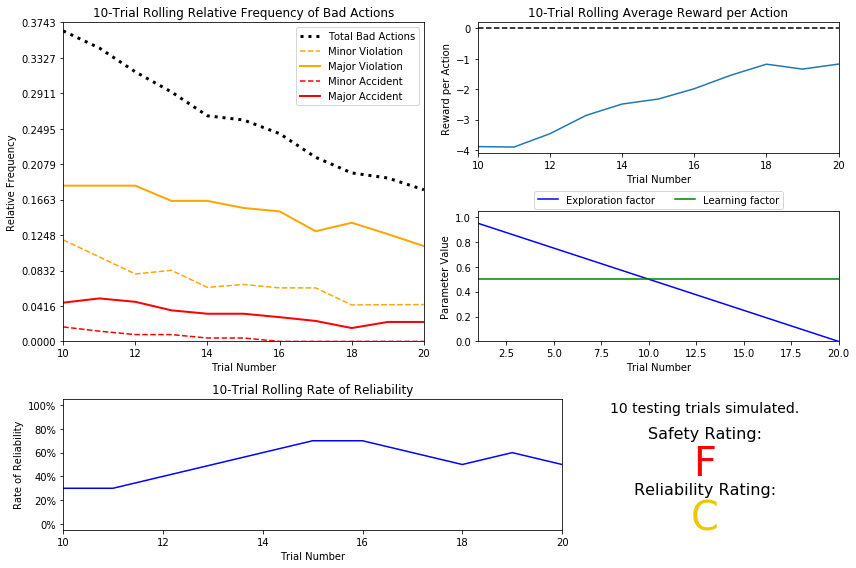

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

Answer:
1. On comparison with the no_learning agent, this driving agent is learning from its experiences even though the choices are made on random. There are subtle improvements in the new driving agent. But, it also displays some similarities such as the Safety rating of both the cases is same. Baring this, the new agent seem to perform better than the previous agent.
2. The driving agent received an approximate of 20 trial before it was tested for 10 test. Yes, the testing of agent begins when its epsilon decays below the tolerance. Here the epsilon drops below the level of tolerance in 20 tries (a small number). Therefore, this training set is not sufficient to train the driving agent. If we were to improve on the decaying of epsilon, we will have more trial cases.
3. Yes the decaying function is accuractely represented in the parameter value v/s Trial number graph. If we observe the line plotted as the exploration factor, we can relate the decaying of epsilon as the slope of the line here.
4. Yes, as we increase the number of trials, we see an improvement in the performance of the driving agent. The average number of bad action has also dropped. Also, the average rewards are also increasing. This is a marker of improvement in performance.
5. The reliability of the driver has improved from F to C rating whereas, the Safety rating continues to stay at F. Practical implication of these rating is that the driver does, at times, reaches the intended destination before the deadline elapses while, the safety rating shows that it breaks lots of rules and regulations and is also involved in accidents.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

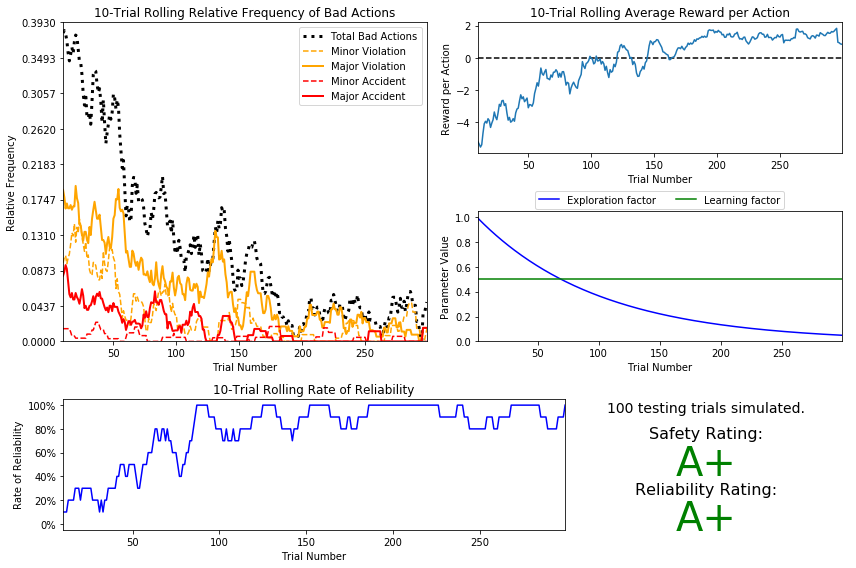

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

Answer:
1. $$epsilon = epsilon * decay\_factor$$
where, decay_factor = 0.01
       epsilon = 1.0
In code:
$$ epsilon -= epsilon*decay\_factor$$

2. Approximately, 300 trials were used before testing the driving agent
3. Default values of Epsilon,Alpha and Tolerance were used. Epsilon and Aplha together contribute towards the Q-learning of the model. Epsilon shows the exploration of the agent to make the decisions. Whereas, the learing rate gives the extend to which the new information is deviating from the old information. In other words, how much does the new data depends on the old data. Keep the value of alpha balance means that we are going to set Q-points which has the right mixture of old and new. Keeping it either too high or low will cause it to ignore on or the other information (old or new). Epsilon- Tolerance work in tandem. Tolerance keep an account on how much of exploration is needed. As the driving agent matures and get more experience, it does not require new state to make decision. Our value keep account on the when to start the testing as well as when to stop exploring and start exploiting.
4. Significant improvement can be seen from the default_learning agent to the improved_learning_agent. The average number of bad decisions have reduced significantely. On average, the awards have increase beyond the '0' mark, showing that the agent is making right decision more often. The Safety and Reliability rating have changed drastically, from F and C respectively, the A+ for both. The rate of reliability is also averaging beyond 80% showing that the agent reaches its destination on time more than chance. 
5. I think, from the above result, that the agent has successfully learnt an appropriate policy to navigate through the road network.
6. I am satisfied with the rating that I have received for this smartcab. But, one should take these rating with a pinch of salt. Since the agent is learning, these ratings are bound to vary. Still, on average, the rating are high enough to make is suitable for the road network we have in place.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

Answer: 
1. 
To discuss the optimal polocy, I have includede the structure of the state that is supplied to the driving agent to make decision:
```
    state = ('light', 'oncoming traffic', 'left', 'next_waypoint')
```
An optimal policy for the driving agent is based on the US right-to-way. i think that the optimal policy is built progressively, 

First, if the light is 'red', the car should take a left or go straight. Making any of the latter actions will lead to either violation or accident. This is interpreted using negative rewards for making such decision. If the agent does not make these decisions, it has two possibilities. Either stay idle at the red light or make a right turn. The right is legal as long as the traffic from the left is not coming. These set of rules will cover the safety of the car. Another rule that should come into the mix is a rule that conveys 'next_waypoint'. This rule will guide the driving agent to get the the destination before the deadline elapses.When the light is 'green' then the driving agent should follow the value set by the next_waypoint provided the intersection is free and no traffic will be in its way

2.The general trend shows that the driving agent is following the optimal policy with some deviation here and there. For instance, when the light is red and the next_waypoint is forward, the driving agent takes a right turn instead of waiting for the light to turn green.

```
    ('red', None, 'left', 'forward')
       -- forward : -24.58
       -- right : 1.30
       -- None : 0.00
       -- left : -10.23
```
```
    ('red', 'left', 'right', 'forward')
      -- forward : -5.06
      -- right : 1.51
      -- None : 0.00
      -- left : -4.79
```

Rest follow the optimal policy as described above.

3.
```
    ('green', None, 'right', 'forward')
      -- forward : 1.26
      -- right : 0.13
      -- None : 0.00
      -- left : 0.28
```
When light is green and there is no oncoming traffic from any side, I would follow the next_waypoint. This will give the driving agent positive reward. This is also shown by the state-action value pair.

Another example
```
    ('red', 'forward', None, 'left')
     -- forward : -10.12
     -- right : 0.90
     -- None : 2.14
     -- left : -10.26
```

In this policy, the light is 'red' and the next_waypoint is 'left'. As per the optimal policy, there are two possibilities that either the agent can take a right turn or wait. when we add weightage to next_waypoint, it can be seen that the agent prefes to stay still rather than taking right turn as taking right turn will deviate it from desination making it difficult to reach it before the deadline elapses. The above ploicy makes sense.

4.
```
    ('green', 'left', 'right', 'forward')
      -- forward : 0.00
      -- right : 0.95
      -- None : -3.91
      -- left : 0.00
```

We would expect a positive reward for forward. The oncoming traffic is taking a left turn. But, all the other agents in the environment will follow the traffic rules and therefore, as per the rules, the traffic moving to left should yield to the smartcab.The driving agent in this case does not take into the consideration that the oncoming traffic will yield and it can safely proceed forward. The driving agent assumes that this situation may lead to accident and therefore, if takes right turn which is also valid but it sort of deviates itself from its next_waypoint

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

Answer:
1. Environment
The two key factos in the environment that effect the smartcab are the initial and the final position of the cab. With every new trial, the initial and the final destination are randomly selected. incorporating these features to account for any optimal future states will be futile due to their random nature.

2. Smartcab.
In order to gauge the future rewards, there needs to be some mechanism to get this information. In this world, the smartcab is only equipped with sensor that can provide it with information regarding one intersection and not the global scope of the map. Thereby, making it limited to the immediate information. With is limited information, the smartcab cannot make prediction about the future.

Hence, I feel that discounting future rewards will not be feasible due to reasons mentioned above.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.